In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import mean_absolute_error, silhouette_score
from sklearn.decomposition import PCA

In [2]:
train_clean = pd.read_csv("train_clean.csv", index_col=0)
train_clean.head()


,originalTitle,rating,startYear,runtimeMinutes,numVotes,totalImages,totalCredits,titleType,canHaveEpisodes,numRegions,countryOfOrigin,genres,ratingNum,numGenres,criticReviewsRatio,awardsAndNominations,hasVideos,moreCountriesOfOrigin
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,3.713572,6.659294,0.693147,3.091042,tvEpisode,False,0.693147,['US'],"['Action', 'Adventure', 'Animation']",8,3,1.000000,False,False,False
1,Looping,"(5, 6]",1982,3.273393,2.484907,0.693147,0.693147,videoGame,False,0.693147,['XWG'],['Action'],6,1,0.000000,False,False,False
2,Idealnaya para,"(5, 6]",1992,4.510860,3.663562,0.693147,3.218876,movie,False,0.693147,['RU'],['Comedy'],6,1,0.000000,False,False,False
3,MasterChef Celebrity México,"(5, 6]",2021,3.465736,2.772589,3.135494,4.043051,tvSeries,True,0.693147,['MX'],['Reality-TV'],6,1,0.000000,False,False,False
4,Seutateueob,"(7, 8]",2020,4.394449,9.662625,5.852202,3.871201,tvSeries,True,3.496508,['KR'],"['Comedy', 'Drama', 'Romance']",8,3,0.008772,True,True,False


In [3]:
train_clean.dtypes[train_clean.dtypes.map(lambda x:x == 'object')]

originalTitle      object
rating             object
titleType          object
countryOfOrigin    object
genres             object
dtype: object

In [4]:
cols_to_drop = ['originalTitle', 'rating', 'countryOfOrigin', 'genres']

train_drop = train_clean.drop(columns=cols_to_drop)

train_drop.info(), train_drop.head()


<class 'pandas.core.frame.DataFrame'>
Index: 16431 entries, 0 to 16430
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   startYear              16431 non-null  int64  
 1   runtimeMinutes         16431 non-null  float64
 2   numVotes               16431 non-null  float64
 3   totalImages            16431 non-null  float64
 4   totalCredits           16431 non-null  float64
 5   titleType              16431 non-null  object 
 6   canHaveEpisodes        16431 non-null  bool   
 7   numRegions             16431 non-null  float64
 8   ratingNum              16431 non-null  int64  
 9   numGenres              16431 non-null  int64  
 10  criticReviewsRatio     16431 non-null  float64
 11  awardsAndNominations   16431 non-null  bool   
 12  hasVideos              16431 non-null  bool   
 13  moreCountriesOfOrigin  16431 non-null  bool   
dtypes: bool(4), float64(6), int64(3), object(1)
memory usage: 1

(None,
    startYear  runtimeMinutes  numVotes  totalImages  totalCredits  titleType  \
 0       1995        3.713572  6.659294     0.693147      3.091042  tvEpisode   
 1       1982        3.273393  2.484907     0.693147      0.693147  videoGame   
 2       1992        4.510860  3.663562     0.693147      3.218876      movie   
 3       2021        3.465736  2.772589     3.135494      4.043051   tvSeries   
 4       2020        4.394449  9.662625     5.852202      3.871201   tvSeries   
 
    canHaveEpisodes  numRegions  ratingNum  numGenres  criticReviewsRatio  \
 0            False    0.693147          8          3            1.000000   
 1            False    0.693147          6          1            0.000000   
 2            False    0.693147          6          1            0.000000   
 3             True    0.693147          6          1            0.000000   
 4             True    3.496508          8          3            0.008772   
 
    awardsAndNominations  hasVideos  more

In [5]:
train_encoded = pd.get_dummies(train_drop, columns=['titleType'], drop_first=True)

train_encoded.head()

,startYear,runtimeMinutes,numVotes,totalImages,totalCredits,canHaveEpisodes,numRegions,ratingNum,numGenres,criticReviewsRatio,...,moreCountriesOfOrigin,titleType_short,titleType_tvEpisode,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame
0,1995,3.713572,6.659294,0.693147,3.091042,False,0.693147,8,3,1.000000,...,False,False,True,False,False,False,False,False,False,False
1,1982,3.273393,2.484907,0.693147,0.693147,False,0.693147,6,1,0.000000,...,False,False,False,False,False,False,False,False,False,True
2,1992,4.510860,3.663562,0.693147,3.218876,False,0.693147,6,1,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,2021,3.465736,2.772589,3.135494,4.043051,True,0.693147,6,1,0.000000,...,False,False,False,False,False,True,False,False,False,False
4,2020,4.394449,9.662625,5.852202,3.871201,True,3.496508,8,3,0.008772,...,False,False,False,False,False,True,False,False,False,False


In [6]:
numeric_columns = train_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_encoded[numeric_columns])



scaler = StandardScaler()
train_data = scaler.fit_transform(df_train_encoded[numeric_columns])

MinMaxScaler è utile se hai bisogno di un intervallo specifico per motivi particolari, ma non è il caso comune per la maggior parte dei clustering.


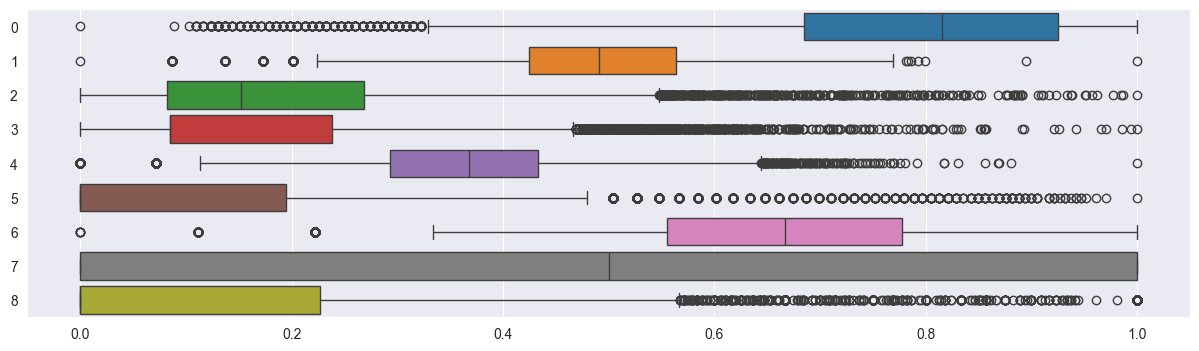

<Axes: >

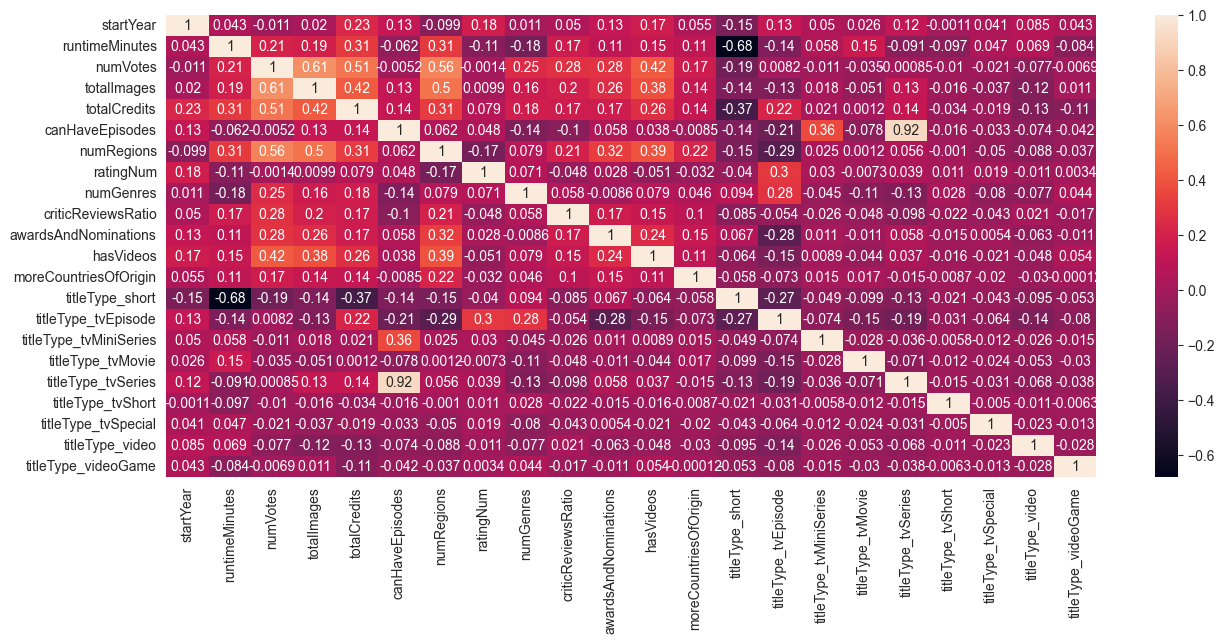

In [7]:
plt.figure(figsize = (15,4))
sns.boxplot(data = train_data, orient = "h")
plt.show()

plt.figure(figsize = (15,6))
sns.heatmap(train_encoded.corr(), annot=True)

In [8]:
%%time

sse_list = []
sil_list = []

max_k = 50
for k in range(2, max_k+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=3000)
    kmeans.fit(train_data)

    # SSE (Sum of Squared Errors)
    sse = kmeans.inertia_
    sse_list.append(sse)

    # Silhouette Score
    sil = metrics.silhouette_score(train_data, kmeans.labels_)
    sil_list.append(sil)

CPU times: total: 9min 15s
Wall time: 2min 51s


"_" attributo o metodo calcolato e non una variabile direttamente impostata dall'utente

È una convenzione per indicare che questi attributi sono specifici del modello e non devono essere modificati direttamente dall'utente.

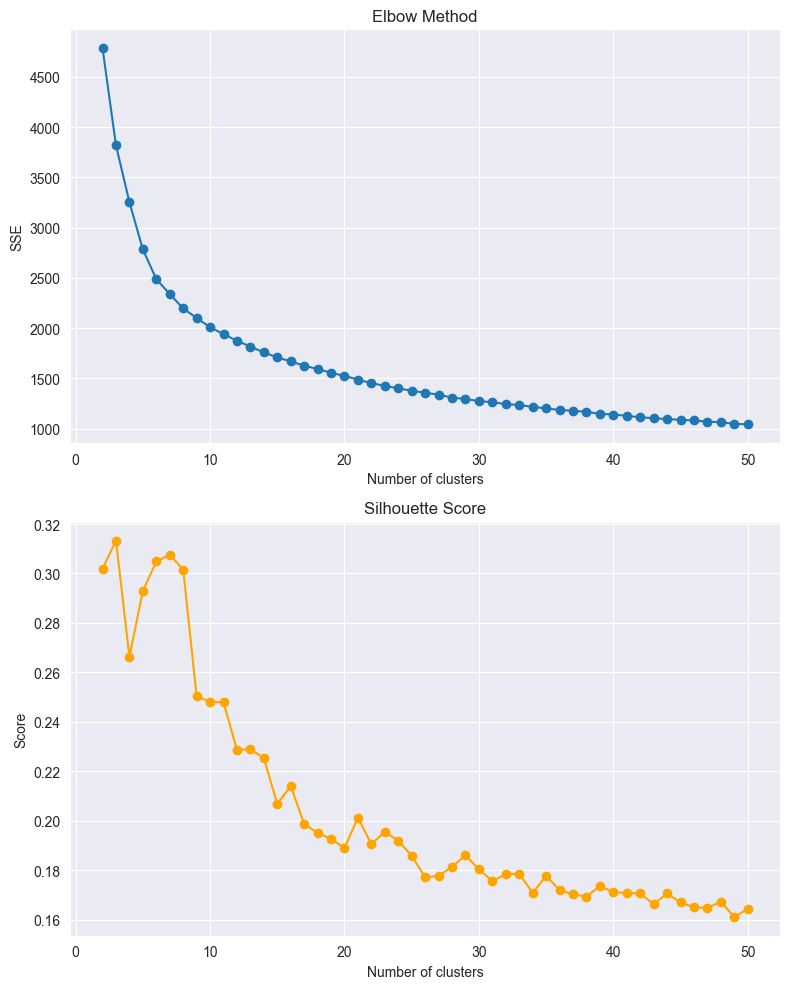

In [9]:
# Visualizzazione dei risultati
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
axs[0].plot(range(2, len(sse_list)+2), sse_list, marker='o')
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('SSE')

axs[1].plot(range(2, len(sse_list)+2), sil_list, marker='o', color='orange')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [10]:
kmeans=KMeans(init='k-means++', n_clusters=10, n_init=10, max_iter=1000)
kmeans.fit(train_data)

KMeans(max_iter=1000, n_clusters=10, n_init=10)

In [11]:
from kneed import KneeLocator
kl = KneeLocator(
    range(2, len(sse_list)+2), sse_list, curve="convex", direction="decreasing"
)
print("Number of cluster: ", kl.elbow)


Number of cluster:  10


In [12]:
print('labels', np.unique(kmeans.labels_, return_counts=True))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))

labels (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 731, 2962, 3345,  865,  951, 3070,  840,  967, 2016,  684]))
sse 2010.0723736824586
silhouette 0.24787098547514605


In [13]:
# Creare un DataFrame per i centroidi
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=numeric_columns)

# Mostrare la tabella
print(centroids_df)

   startYear  runtimeMinutes  numVotes  totalImages  totalCredits  numRegions  \
0   0.365750        0.353147  0.144390     0.101342      0.216265    0.087777   
1   0.853897        0.484088  0.126708     0.118446      0.337112    0.052396   
2   0.804538        0.444720  0.179370     0.141287      0.373570    0.059889   
3   0.737113        0.536782  0.473423     0.407465      0.480498    0.567544   
4   0.744019        0.549251  0.411416     0.359262      0.465318    0.527093   
5   0.834673        0.444764  0.139190     0.119556      0.343926    0.066669   
6   0.831262        0.473127  0.267275     0.190484      0.420450    0.087866   
7   0.810590        0.535351  0.192796     0.156568      0.360738    0.155010   
8   0.683632        0.519687  0.130235     0.115277      0.331039    0.112471   
9   0.816861        0.491738  0.223660     0.175496      0.381248    0.140668   

   ratingNum     numGenres  criticReviewsRatio  
0   0.558900  5.273598e-01            0.035615  
1   0.7693

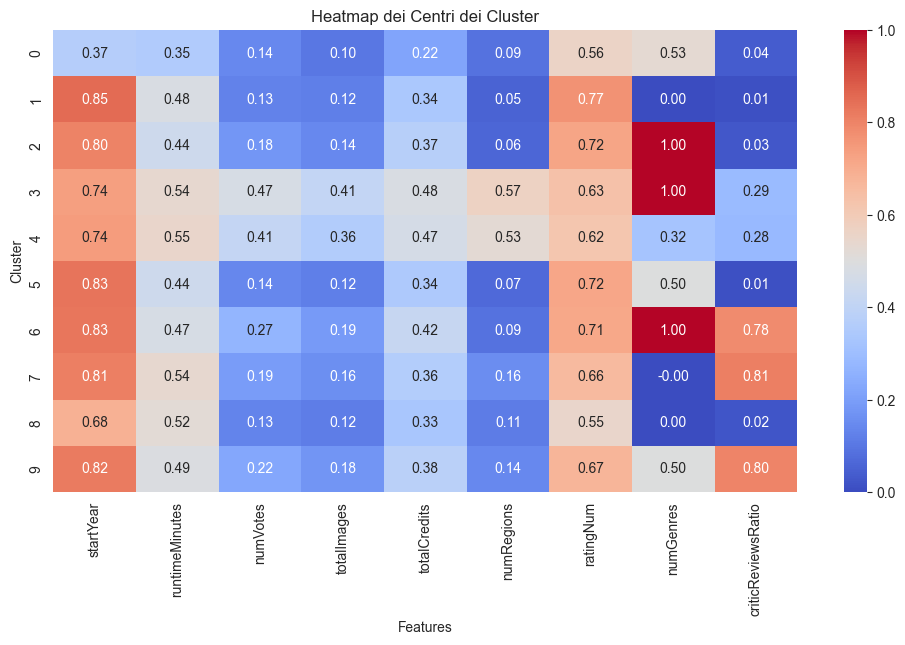

In [14]:

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap dei Centri dei Cluster")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

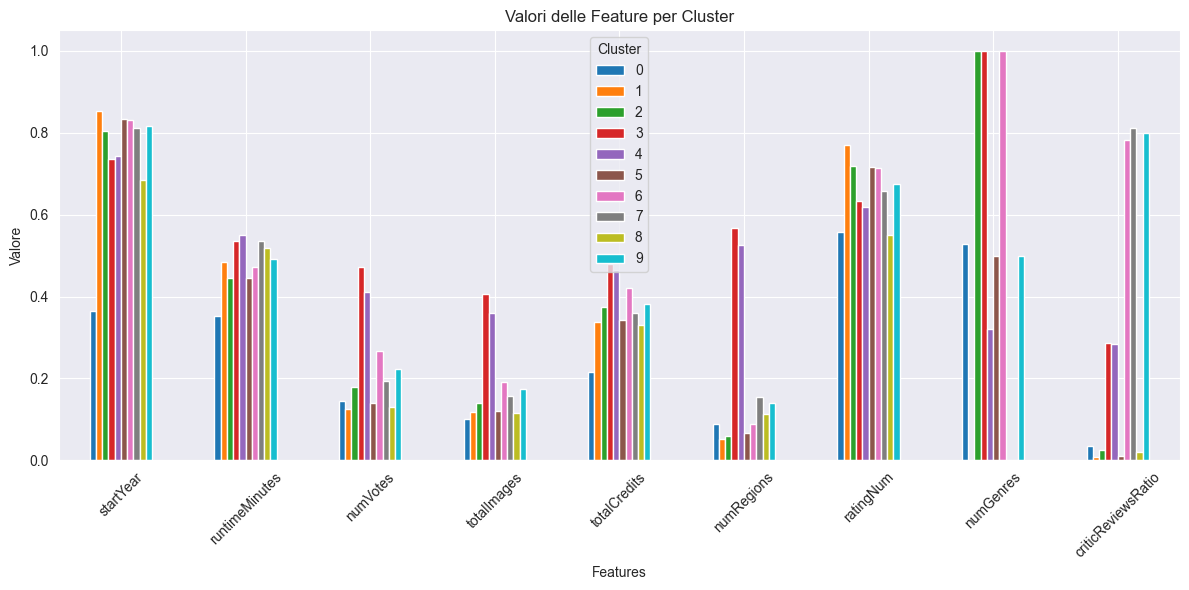

In [15]:

# Plot per una singola feature
centroids_df.T.plot(kind='bar', figsize=(12, 6))
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45)
plt.title("Valori delle Feature per Cluster")
plt.xlabel("Features")
plt.ylabel("Valore")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

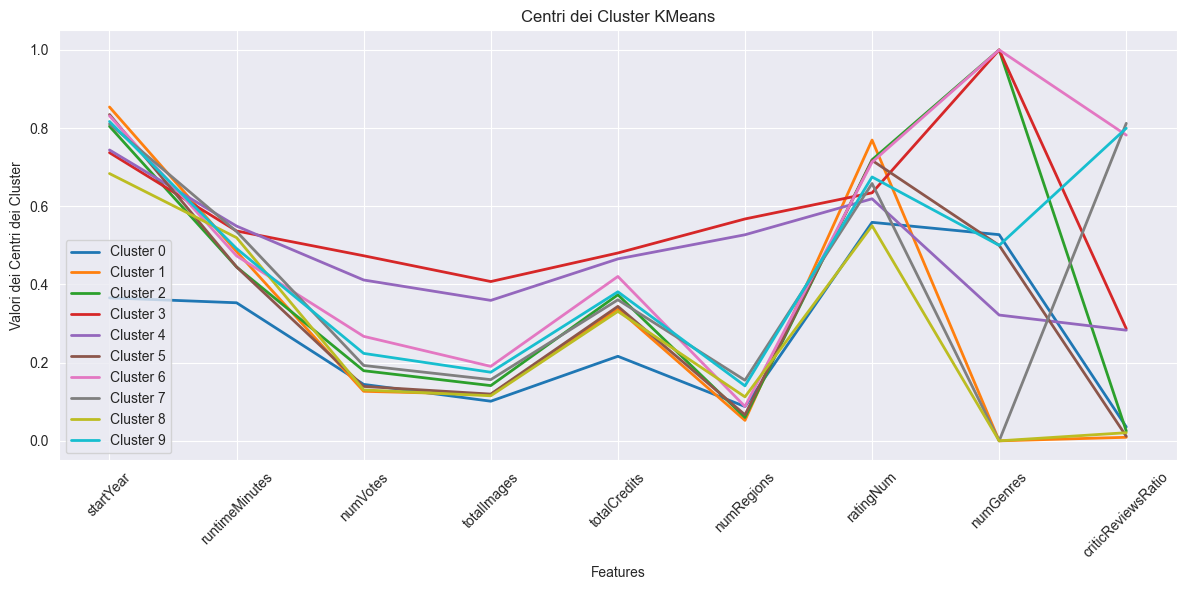

In [16]:
plt.figure(figsize=(12, 6))

# Assicurati che stai iterando sulle dimensioni corrette
for i in range(len(kmeans.cluster_centers_)):
    # Genera l'asse x in base al numero di colonne/features
    x = range(kmeans.cluster_centers_.shape[1])  # Numero delle feature nei centri dei cluster
    y = kmeans.cluster_centers_[i]  # Centri di cluster (y)

    # Tracciare i dati correttamente
    plt.plot(x, y, label=f'Cluster {i}', linewidth=2)

# Aggiunge etichette all'asse x usando il nome delle feature
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45)

# Mostra la legenda e il grafico
plt.legend()
plt.xlabel("Features")
plt.ylabel("Valori dei Centri dei Cluster")
plt.title("Centri dei Cluster KMeans")
plt.tight_layout()  # Migliora il layout per evitare sovrapposizioni
plt.show()

In [17]:
print(kmeans.cluster_centers_.shape)

(10, 9)


In [18]:
df_clusters = train_data.copy()
df_clusters = pd.DataFrame(df_clusters)
df_clusters['labels'] = kmeans.labels_
df_clusters.head()

,0,1,2,3,4,5,6,7,8,labels
0,0.801370,0.463808,0.405975,0.084924,0.319846,0.000000,0.777778,1.0,1.000000,6
1,0.712329,0.408832,0.057812,0.084924,0.071724,0.000000,0.555556,0.0,0.000000,8
2,0.780822,0.563386,0.156117,0.084924,0.333074,0.000000,0.555556,0.0,0.000000,8
3,0.979452,0.432854,0.081806,0.384160,0.418356,0.000000,0.555556,0.0,0.000000,1
4,0.972603,0.548846,0.656466,0.717011,0.400573,0.788491,0.777778,1.0,0.008772,3


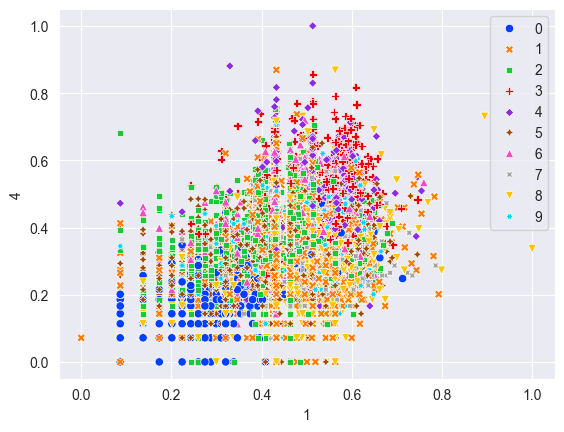

In [19]:
sns.scatterplot(data=df_clusters,
                x=1,
                y=4,
                hue=kmeans.labels_,
                style=kmeans.labels_,
                palette="bright")
plt.show()

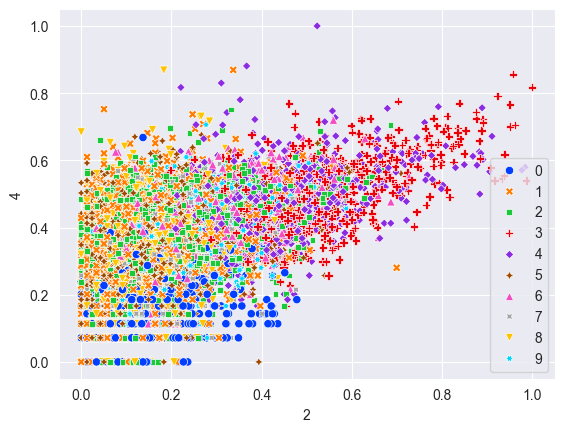

In [20]:
sns.scatterplot(data=df_clusters,
                x=2,
                y=4,
                hue=kmeans.labels_,
                style=kmeans.labels_,
                palette="bright")
plt.show()